EDA PROJECT ON EARTHQUAKE DATA BETWEEN 1995-2023

In [69]:
#Importing Dataset 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("D:\datascience\Dataset\earthquake_1995-2023.csv")

In [70]:
# To know how many rows and columns 
df.shape

(1000, 19)

In [71]:
#Pring the first and last five rows of the dataset
print(df.head())
print(df.tail())

                                      title  magnitude         date_time  cdi  \
0          M 6.5 - 42 km W of Sola, Vanuatu        6.5  16-08-2023 12:47    7   
1  M 6.5 - 43 km S of Intipucá, El Salvador        6.5  19-07-2023 00:22    8   
2  M 6.6 - 25 km ESE of Loncopué, Argentina        6.6  17-07-2023 03:05    7   
3     M 7.2 - 98 km S of Sand Point, Alaska        7.2  16-07-2023 06:48    6   
4                  M 7.3 - Alaska Peninsula        7.3  16-07-2023 06:48    0   

   mmi   alert  tsunami  sig net  nst      dmin    gap magType    depth  \
0    4   green        0  657  us  114  7.177000   25.0     mww  192.955   
1    6  yellow        0  775  us   92  0.679000   40.0     mww   69.727   
2    5   green        0  899  us   70  1.634000   28.0     mww  171.371   
3    6   green        1  860  us  173  0.907000   36.0     mww   32.571   
4    5     NaN        1  820  at   79  0.879451  172.8      Mi   21.000   

   latitude  longitude               location      continent  

In [72]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

In [73]:
#Statistical Summary of the Dataset
df.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.940150,3.605000,6.02700,0.325000,847.915000,193.918000,1.125174,20.926290,74.612541,4.315554,51.486576
std,0.438148,3.328972,1.43399,0.468609,301.802632,239.045858,2.073164,24.415895,130.812590,26.633320,117.478302
min,6.500000,0.000000,1.00000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.00000,0.000000,691.000000,0.000000,0.000000,0.000000,16.000000,-13.518500,-71.694450
50%,6.800000,4.000000,6.00000,0.000000,744.000000,0.000000,0.000000,18.000000,29.000000,-2.443500,107.791000
75%,7.100000,7.000000,7.00000,1.000000,874.250000,403.000000,1.549250,27.000000,55.000000,25.167250,148.364750
max,9.100000,9.000000,10.00000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


In [74]:
#Check if there are any missing values and count the number of misiing values
df.isna().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        551
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       6
continent    716
country      349
dtype: int64

Questions and its solution related to the dataset

In [75]:
#How many earthquakes were recorded between 1995 and 2023?
num_earthquakes = df.shape[0]
print(f"Number of Earthquakes: {num_earthquakes}")

Number of Earthquakes: 1000


In [76]:
#How many earthquakes occurred between 12:00 PM and 7:00 PM based on the recorded date and time?

time_column = 'date_time'
df[time_column] = pd.to_datetime(df[time_column], format='%d-%m-%Y %H:%M', errors='coerce')
df = df.dropna(subset=[time_column])
filtered_df = df[(df[time_column].dt.hour >= 12) & (df[time_column].dt.hour < 19)]
print("Number of earthquakes between 12:00 PM and 7:00 PM:", len(filtered_df))

Number of earthquakes between 12:00 PM and 7:00 PM: 312


In [77]:
#What is the average magnitude of earthquakes during this period?
avg_magnitude = df['magnitude'].mean()
print(f"Average Magnitude: {avg_magnitude:.2f}")

Average Magnitude: 6.94


In [78]:
#What are the minimum and maximum magnitudes recorded?

min_magnitude = df['magnitude'].min()
max_magnitude = df['magnitude'].max()
print(f"Minimum Magnitude: {min_magnitude}")
print(f"Maximum Magnitude: {max_magnitude}")

Minimum Magnitude: 6.5
Maximum Magnitude: 9.1


country
Indonesia                   140
Papua New Guinea             81
Chile                        42
Vanuatu                      36
Mexico                       31
Japan                        26
Peru                         26
Solomon Islands              25
United States of America     24
Philippines                  23
Name: count, dtype: int64


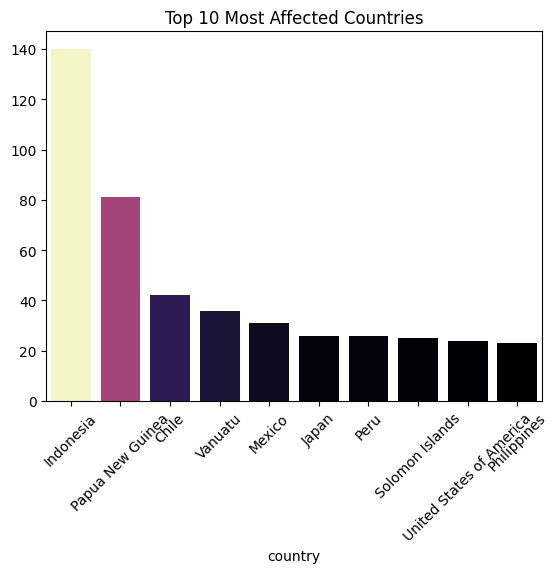

In [79]:
#Which countries or regions experienced the most earthquakes?
top_countries = df['country'].value_counts().head(10)
print(top_countries)

sns.barplot(x=top_countries.index, y=top_countries.values, hue=top_countries,palette='magma',legend=False)
plt.xticks(rotation=45)
plt.title('Top 10 Most Affected Countries')
plt.show()


Top 10 Most Affected Countries:
 country
Indonesia                   140
Papua New Guinea             81
Chile                        42
Vanuatu                      36
Mexico                       31
Japan                        26
Peru                         26
Solomon Islands              25
United States of America     24
Philippines                  23
Name: count, dtype: int64


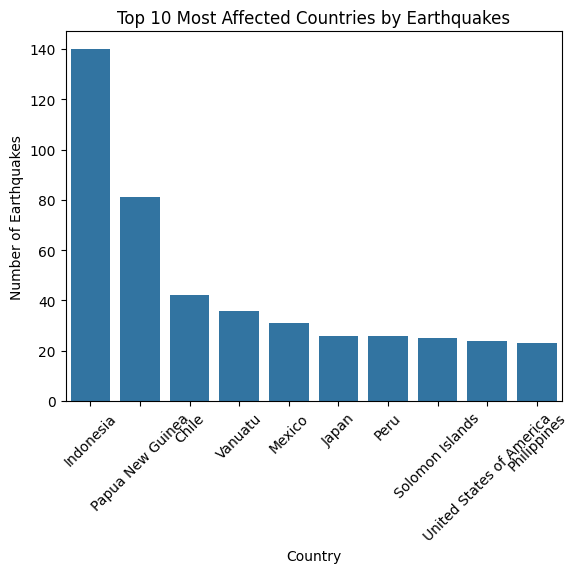

In [80]:
#What are the top 10 most affected areas by earthquake frequency?
top_countries = df['country'].value_counts().head(10)
print("Top 10 Most Affected Countries:\n", top_countries)

sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Most Affected Countries by Earthquakes')
plt.xlabel('Country')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=45)
plt.show()

country
Canada                                                        7.800000
Martinique                                                    7.400000
Turkiye                                                       7.333333
Pakistan                                                      7.280000
United Kingdom of Great Britain and Northern Ireland (the)    7.220000
Saudi Arabia                                                  7.200000
Peru                                                          7.200000
Venezuela                                                     7.150000
Haiti                                                         7.100000
South Georgia and the South Sandwich Islands                  7.100000
Name: magnitude, dtype: float64


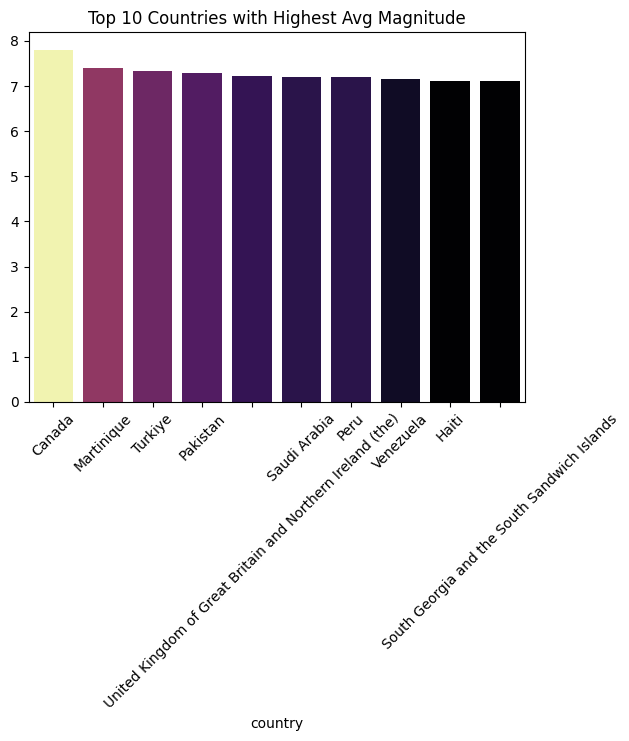

In [81]:
top_magnitude = df.groupby('country')['magnitude'].mean().sort_values(ascending=False).head(10)
print(top_magnitude)

sns.barplot(x=top_magnitude.index, y=top_magnitude.values,hue=top_magnitude ,palette='inferno', legend=False)
plt.xticks(rotation=45)
plt.title('Top 10 Countries with Highest Avg Magnitude')
plt.show()


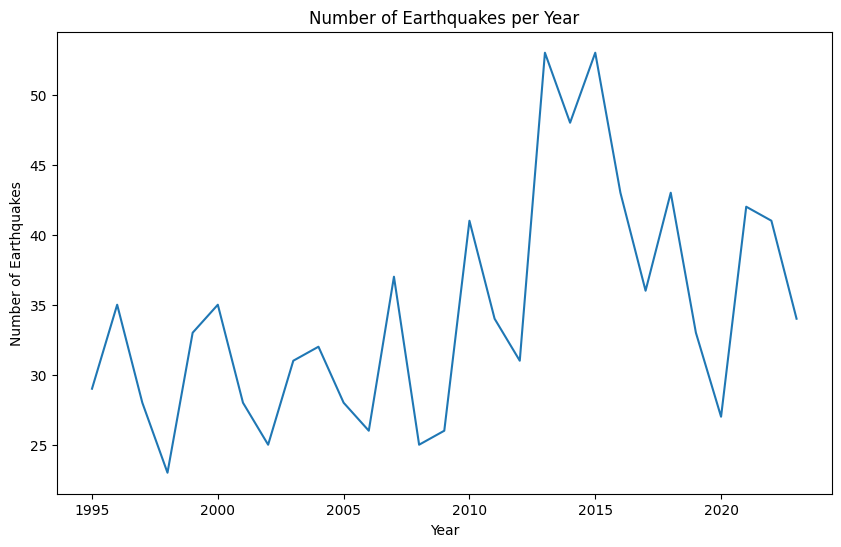

In [82]:
#Find the number of earthquakes per year
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M', dayfirst=True, errors='coerce')
df['Year'] = pd.to_datetime(df['date_time']).dt.year
yearly_counts = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='line')
plt.title('Number of Earthquakes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.show()


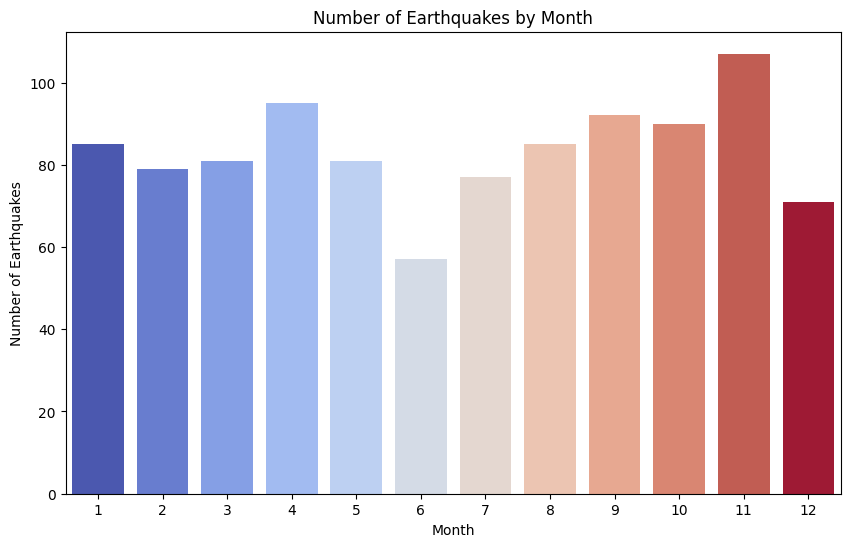

In [83]:
# Bar plot of earthquake counts by month
df['Month'] = df['date_time'].dt.month
monthly_counts = df['Month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, hue=monthly_counts.index, palette='coolwarm', legend=False)
plt.title('Number of Earthquakes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Earthquakes')
plt.show()



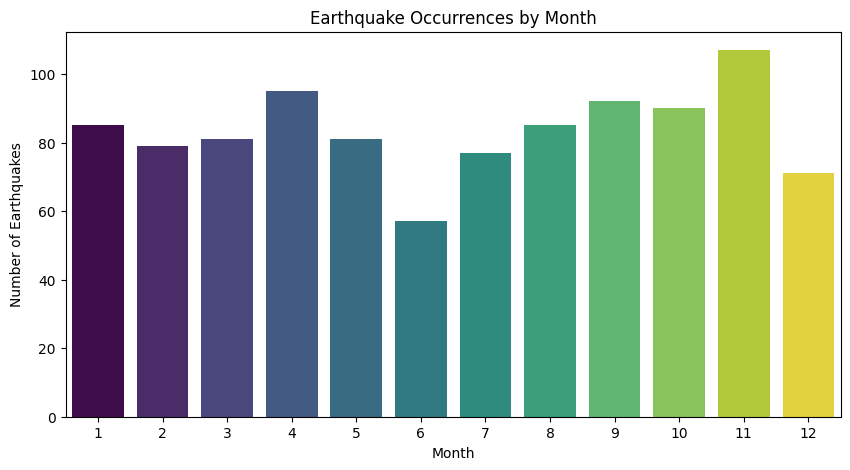

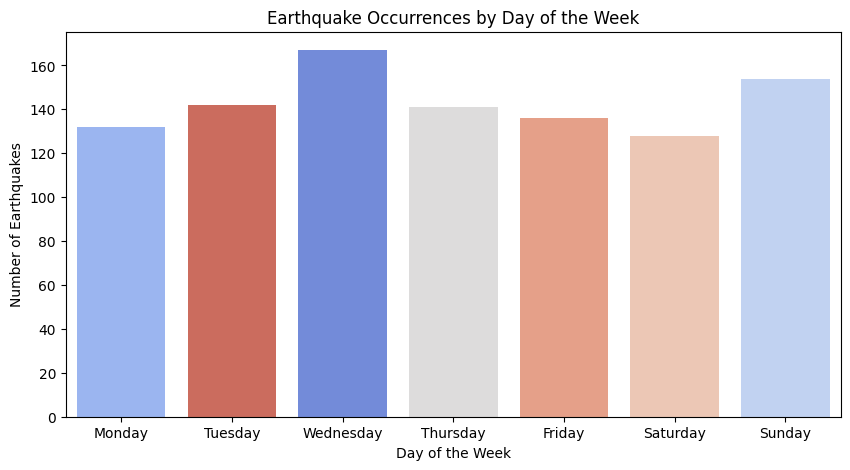

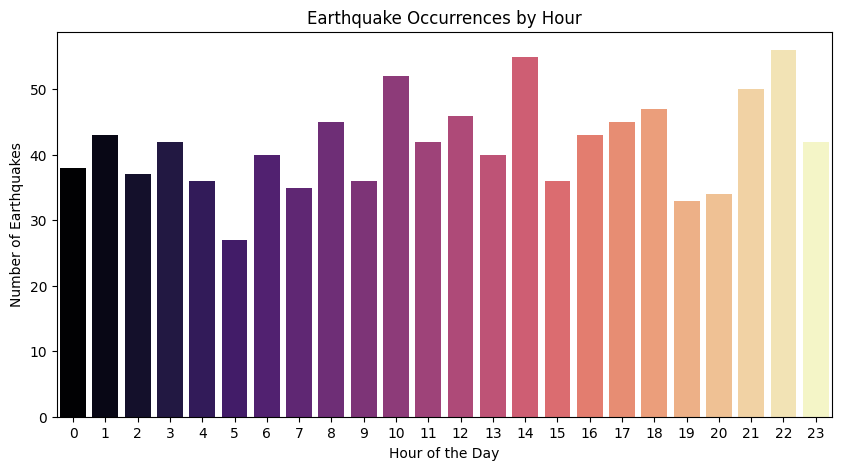

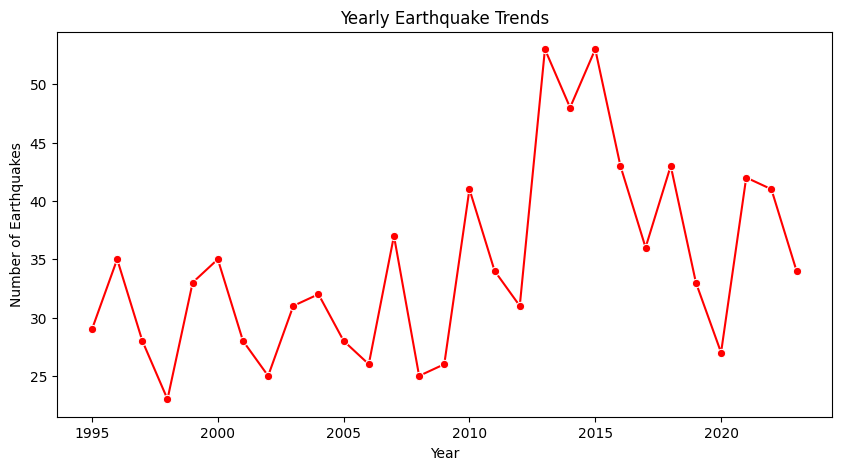

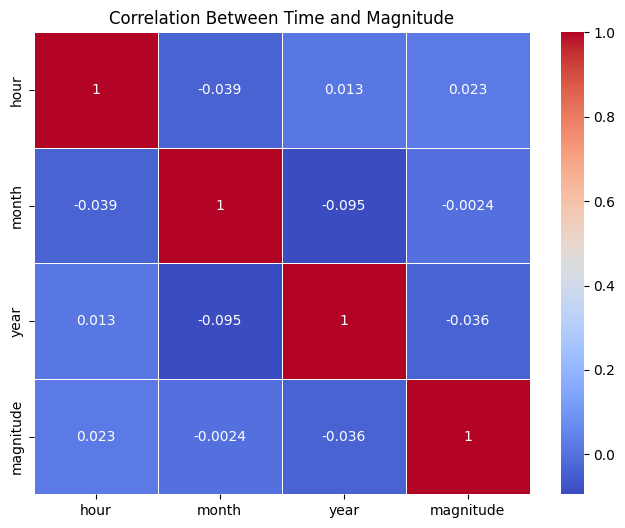

In [84]:
#Are there identifiable patterns in earthquake occurrences based on time (hour, day, month, and year) that could help in predicting future earthquakes?
df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month
df['day_of_week'] = df['date_time'].dt.day_name()
df['hour'] = df['date_time'].dt.hour


#1. Monthly Earthquake Trends**
plt.figure(figsize=(10,5))
sns.countplot(x=df['month'], hue=df['month'], palette="viridis", legend=False)
plt.xlabel("Month")
plt.ylabel("Number of Earthquakes")
plt.title("Earthquake Occurrences by Month")
plt.show()

#2. Daily Earthquake Trends**
plt.figure(figsize=(10,5))
sns.countplot(x=df['day_of_week'], hue=df['day_of_week'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],  palette="coolwarm", legend=False)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Earthquakes")
plt.title("Earthquake Occurrences by Day of the Week")
plt.show()

#3. Hourly Earthquake Trends**
plt.figure(figsize=(10,5))
sns.countplot(x=df['hour'], hue=df['hour'], palette="magma", legend=False)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Earthquakes")
plt.title("Earthquake Occurrences by Hour")
plt.show()

#4. Yearly Earthquake Trends**
plt.figure(figsize=(10,5))
sns.lineplot(x=df['year'].value_counts().index, y=df['year'].value_counts().values, marker="o", color="red")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.title("Yearly Earthquake Trends")
plt.show()

#5. Correlation Analysis (Optional, if magnitude column exists)**
if 'magnitude' in df.columns:
    plt.figure(figsize=(8,6))
    sns.heatmap(df[['hour', 'month', 'year', 'magnitude']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Between Time and Magnitude")
    plt.show()


